# QUESTIONS 1
#### **Selected question :** How does the frequency of mental health illness and attitudes towards mental health vary by geographic location, and what are the strongest predictors of mental health illness and specific attitudes towards mental health in the workplace?

<a href='#Question'> 1_1.Question:</a>

<a href='#Data collection'> 1_2.Data collection:</a>

<a href='#Data cleaning/Preprocess'> 1_3.Data cleaning/ Preprocess:</a>
 * Rename column names and remove unnessarry comlumns
 * Handling with Null values
 * Checking oulier values and data transforming
 * Convert 'Age' columns into categorical type
 * Cleaning 'Gender' column
 * Converting "Maybe" answer

<a href='#Analysis'> 1_4.Analysis:</a>
 * Analysing geographic location
 * Finding strongest predictors of mental health illness
     * Building Bayesian Network in background features 
 * Analysing specific attitudes towards mental health in the workplace

<a href='#Visualisation'> 1_5.Visualisation:</a>
 * Geographic location
 * Mental health status and back ground information
 * Mental health attitudes
   * Building Bayesian Network in consequence features 

<a href='#Insight'> 1_6.Insight:</a>

# QUESTIONS 3
#### **Selected question :** What were the top Australian news topics over the last decade, and what can these say about the national conversation?

<a href='#2_1'> 2_1.Question:</a>

<a href='#2_2'> 2_2.Data collection:</a>

<a href='#2_3'> 2_3.Data cleaning/ Preprocess:</a>
 * Rename column names and remove unnessarry comlumns
 * Handling with Null values
 * Checking oulier values and data transforming
 * Convert 'Age' columns into categorical type
 * Cleaning 'Gender' column
 * Converting "Maybe" answer

<a href='#2_4'> 2_4.Analysis:</a>
 * Analysing geographic location
 * Finding strongest predictors of mental health illness
     * Building Bayesian Network in background informations 
 * Analysing specific attitudes towards mental health in the workplace

<a href='#2_5'> 2_5.Visualisation:</a>
 * Geographic location
 * Mental health status and back ground information
 * Mental health attitudes

<a href='#2_6'> 2_6.Insight:</a>




***
### **Selected question :** How does the frequency of mental health illness and attitudes towards mental health vary by geographic location, and what are the strongest predictors of mental health illness and specific attitudes towards mental health in the workplace?

<a id='Question'></a>
## 1_1.Question

Mental health

#### Stack holders, Who interest this data analysis. 
**Empolyer:** Company owner and high level managers would more concerning mental illness because of mental illness can lead to more negative consequences than physical illness. Specially for tech companies, for instance if their worker has physical disability, they can facilite to working eniviroiments for those staffs. However, mental illness is difficult to identify.Even employee who has mental illness, didn't know own mental health condition. Therefore, tech compnanies try to find solution for mental health of their current staff or new empolyees. That data analysis will identify strongest predictors mental health.

**Non-profit organizatios:** One of example is OSMI. That kind orgizations tend to help people who has any level of mental illnes.Therefore, the organizations try undenstantand attitudes of mental illness.

**Goverment/Healh care system:** Mental health is one the major emerging issue. Also they have similarly intend to find strongest predictors of mental health illness. 

Before begin data analysis, I have descided to divide given questions into three sub questions. That can be staigthforward to answers questions.

#### Following specific quesions can be help to answer main question
1. What is the frequency of each geographic location (countries and states)? Which countries have highest number of mental illnes?
2. Which factor can be strongest predictors of mental health illness?
3. What is the specific attitudes towards mental health in the workplace?


***
<a id='Data collection'></a>
## 1_2.Data collection

In [51]:
# importing all necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import os
import math
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum as bn_graphs
from pyAgrum.lib.bn2roc import showROC


# need to look at all columns because the original dataset has 63 columns,
pd.set_option('display.max_columns', 100)

Before begin I have checked both 2014 an 2016 survey from Open Sourcing mental illness/OSMI/. But 2014 survey didn't include clear indication of mentall illness. Despite 2016 survey asked **Do you currently have a mental health disorder?**. That question will help to analyse attitude of  mentall illness condition in tech work place. 
      
      Data source : Kaagle.com
- Percentage of population with mental disorer by each country. Year between 1990-2019
 Source : [ourworldindata.org](https://ourworldindata.org/mental-health)



In [8]:

# reading 2006 survey data that would be help to compare the changes of attitudes.
df_survey=pd.read_csv('mental-heath-in-tech-2016.csv')

#Percentage of population with mental disorer by year andeach country.
#df_population=pd.read_csv('share-with-mental-and-substance-disorders.csv')
import warnings; warnings.simplefilter('ignore')

In [9]:
#Let's look at each datasets. 
#We don't need to show entire dataset. It should be enought for first 3 records of each datasets.

print("The dataset has %d rows and %d columns" %(df_survey.shape[0], df_survey.shape[1]))
df_survey.head(3)
# Column names are too long, it is more like discriptions. We need change it to short.


The dataset has 1433 rows and 63 columns


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

***
<a id='Data cleaning/Preprocess'></a>
## 1_3.Data cleaning/Preprocess

Firsly, we need check general tendency of dataset, such as what is the percentage of missing data, determing the values of categorical datas. 


In [10]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
Are you self-employed?                                                                                                                                                              1433 non-null int64
How many employees does your company or organization have?                                                                                                                          1146 non-null object
Is your employer primarily a tech company/organization?                                                                                                                             1146 non-null float64
Is your primary role within your company related to tech/IT?                                                                                                                        263 non-null float64
Does your employer provide mental health benefits as part of healthcare coverage?        

### Rename column names and remove unnessarry comlumns
Firstly, I have changed columns names to short sentences, then choosed columns which I need in data analysis. We don't need to select all columns, because purpose of same questions quite similar such as they asked "What country do you work in?","What country do you live in?", in this case I have selected "What country do you work in?" due we concering working enviroments.

In [11]:
# rename column names 
columns_names={
        # General employment background features
       'Are you self-employed?':'self_employed',
       'How many employees does your company or organization have?':'no_employees',
       'Is your employer primarily a tech company/organization?':'tech_company',
       'Is your primary role within your company related to tech/IT?':'tech_role',
    
       # Quesion related with how employer concerning mental illness 
       'Does your employer provide mental health benefits as part of healthcare coverage?':'emp_health_benefits',
       'Do you know the options for mental health care available under your employer-provided coverage?':'emp_care_options',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':'emp_discussed_mental',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?':'emp_offer_resources',
    
       # Difficulies of mental illness
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:':'dif_request_medical_leave',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?':'dif_mental_health_consequence',
       'Do you think that discussing a physical health issue with your employer would have negative consequences?':'dif_phys_health_consequence',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?':'dif_discuss_coworkers',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?':'dif_discuss_supervisor',
       'Do you feel that your employer takes mental health as seriously as physical health?':'dif_mental_vs_physical',
    
       # Consequence of mental illness
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?':'reveal_mental_health',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?':'negative_impact',
       'Do you believe your productivity is ever affected by a mental health issue?':'productivity_effect',
       'How willing would you be to share with friends and family that you have a mental illness?':'share_mental_illness',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?':'observed_bad_response',
    
        # medical condition
       'Do you have a family history of mental illness?':'mental_history',
       'Have you had a mental health disorder in the past?': 'past_mental',
       'Do you currently have a mental health disorder?': "mental_illness",
       'If yes, what condition(s) have you been diagnosed with?':'mental_condition',
       'Have you been diagnosed with a mental health condition by a medical professional?':'diagnosed_professional',
       'Have you ever sought treatment for a mental health issue from a mental health professional?':'seek_treatment',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?':'work_interferes',
    
        # personal backgrounds
       'What is your age?':'age', 
       'What is your gender?':'gender',
       'What country do you work in?':'country',
       'What US state or territory do you work in?':'state',
       'Which of the following best describes your work position?':'position',
       'Do you work remotely?':'remote_work'
       }

df_survey.rename(columns=columns_names,inplace=True)


In [12]:
df_survey_short=df_survey[[
                'mental_illness',
                'age',
                'gender',
                'country',
                'state',
                'position',
                'remote_work',
                'self_employed',
                'no_employees',
                'tech_company',
                'tech_role',
                'mental_history',
                'past_mental',
                'mental_condition',
                'diagnosed_professional',
                'seek_treatment',
                'work_interferes',          
                'emp_health_benefits',
                'emp_care_options',
                'emp_discussed_mental',
                'emp_offer_resources',
                'dif_request_medical_leave',
                'dif_mental_health_consequence',
                'dif_phys_health_consequence',
                'dif_discuss_coworkers',
                'dif_discuss_supervisor',
                'dif_mental_vs_physical',
                'reveal_mental_health',
                'negative_impact',
                'productivity_effect',
                'share_mental_illness',
                'observed_bad_response']]

In [13]:
df_survey_short.describe(include=['O'])

,mental_illness,gender,country,state,position,remote_work,no_employees,mental_history,past_mental,mental_condition,diagnosed_professional,work_interferes,emp_health_benefits,emp_care_options,emp_discussed_mental,emp_offer_resources,dif_request_medical_leave,dif_mental_health_consequence,dif_phys_health_consequence,dif_discuss_coworkers,dif_discuss_supervisor,dif_mental_vs_physical,reveal_mental_health,negative_impact,productivity_effect,share_mental_illness,observed_bad_response
count,1433,1430,1433,851,1433,1433,1146,1433,1433,568,1433,1433,1146,1013,1146,1146,1146,1146,1146,1146,1146,1146,287,287,287,1433,1344
unique,3,70,53,48,264,3,6,3,3,128,2,5,4,3,3,3,6,3,3,3,3,3,5,4,4,6,4
top,Yes,Male,United States of America,California,Back-end Developer,Sometimes,26-100,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",No,Not applicable to me,Yes,No,No,No,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,Not applicable to me,Not applicable to me,Yes,Somewhat open,No
freq,575,610,851,141,263,757,292,670,736,117,717,557,531,354,813,531,281,487,837,479,428,493,111,133,204,640,567


In [14]:
df_survey_short.to_csv('df_survey_short.csv',index=0)

### Handling with Null values

'state', 'work_interfere', and 'mental_condition' columns have null values.  It is difficulty to estimating categorical null values. In this case I just replaced "Not Specified". If columns which has numeric value, we can handle using with different methodology, such as filled with avarage values and calculating interpolite.

In [58]:
df_survey_short.fillna("Not Specified", inplace=True)

df_survey_short.replace({'self_employed': {0:'No',1:'Yes'}},inplace=True)
df_survey_short.replace({'seek_treatment': {0:'No',1:'Yes'}},inplace=True)
df_survey_short.replace({'tech_company': {0:'No',1:'Yes'}},inplace=True)
df_survey_short.replace({'tech_role': {0.0:'No',1.0:'Yes'}},inplace=True)

### Checking oulier values and data transforming
Let's check whith distict value of each columns of data. That can reveal abnormal values.

In [16]:
# starts from Age columns. Counting distict values is easy way to check abnormal values.
df_survey_short.age.value_counts()

30     94
31     82
29     79
28     74
35     74
32     72
34     69
33     69
26     64
27     63
37     59
39     55
38     54
36     50
25     44
24     42
40     36
22     32
44     31
43     30
42     29
45     27
23     24
41     24
46     22
21     15
47     14
49     13
55     12
48      9
50      9
54      7
51      7
52      7
20      6
56      5
57      4
63      4
19      4
53      3
61      2
59      2
17      1
15      1
323     1
99      1
58      1
62      1
65      1
66      1
70      1
74      1
3       1
Name: age, dtype: int64

In [17]:
df_survey_short[(df_survey['age']<17)|(df_survey['age']>100)]

,mental_illness,age,gender,country,state,position,remote_work,self_employed,no_employees,tech_company,tech_role,mental_history,past_mental,mental_condition,diagnosed_professional,seek_treatment,work_interferes,emp_health_benefits,emp_care_options,emp_discussed_mental,emp_offer_resources,dif_request_medical_leave,dif_mental_health_consequence,dif_phys_health_consequence,dif_discuss_coworkers,dif_discuss_supervisor,dif_mental_vs_physical,reveal_mental_health,negative_impact,productivity_effect,share_mental_illness,observed_bad_response
564,No,323,Male,United States of America,Oregon,Back-end Developer,Sometimes,No,100-500,1,Not Specified,Yes,No,Not Specified,No,No,Not applicable to me,Yes,No,I don't know,I don't know,I don't know,No,No,Maybe,Maybe,I don't know,Not Specified,Not Specified,Not Specified,Neutral,Maybe/Not sure
656,Maybe,3,Male,Canada,Not Specified,Back-end Developer,Sometimes,No,More than 1000,1,Not Specified,I don't know,Yes,Not Specified,Yes,Yes,Rarely,Yes,I am not sure,Yes,Yes,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,Not Specified,Not Specified,Not Specified,Somewhat open,Maybe/Not sure
808,No,15,male,Canada,Not Specified,Other,Sometimes,Yes,Not Specified,Not Specified,Not Specified,No,No,Not Specified,No,No,Not applicable to me,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not applicable to me,Not applicable to me,Not applicable to me,Not applicable to me (I do not have a mental i...,Not Specified


I have dropped oulier rows. Only three record has ourlier, so it wont be affect to final analysis.

### Convert 'Age' columns into categorical type

In [18]:
df_survey_short.drop( df_survey[(df_survey['age']<17)|(df_survey['age']>100)].index, inplace=True)

Then 'age' columns needs to discretize categorical types. That is can be more useful for data analysis in this case.

In [19]:
df_survey_short['age_cat']=df_survey.age.apply(lambda x:('18-24' if x<25 else ('25-34' if x<35 else ('35-44' if x<45 else ('45-54' if x<55 else 'More than 55')))))
# lets look at number of each age categories.
df_survey_short.age_cat.value_counts()

25-34           710
35-44           442
18-24           124
45-54           118
More than 55     36
Name: age_cat, dtype: int64

### Cleaning 'Gender' column

In [20]:
# lets check Gender columns
df_survey_short.gender.value_counts()
# gender looks much more worst than age. Lets fix Gender columns

Male                         608
male                         248
Female                       153
female                        95
M                             86
                            ... 
Male.                          1
Dude                           1
Fluid                          1
AFAB                           1
Female assigned at birth       1
Name: gender, Length: 71, dtype: int64

In [21]:
# I have created list for each genders catergories. 
#Some of inputted genders are difficult to recognising. So I have new category named "Not Specified"

male_str=['Male', 'male','male ' ,'Male ','M ', 'M', 'm', 'Cis Male', 'man','Man', 'ostensibly male, unsure what that really means','Male.',
          'Sex is male' ,'Male (cis)','male 9:1 female, roughly','Dude','cisdude','Cis male','MALE','Male (trans, FtM)','M|',
          'Mail', 'Make','male (cis)', 'cis male', 'maile', 'Malr', 'Cis Man', 'Mal', 'msle', 'male.', 'sex is male', 'malr','Sex is male', 
     'cis man', 'mail',
         "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "]
female_str=['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB']

trans_str=['Bigender', 'non-binary', 'Other/Transfeminine','Transitioned, M2F','Male/genderqueer'
       'Androgynous', 'Other', 'nb masculine','Trans',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer','Male/genderqueer','Androgynous',
       'Genderflux demi-girl', 'Transgender woman']
other_str=[""]

# replaced unstructured 
df_survey_short['gender'] = df_survey_short['gender'].apply(lambda x:"Male" if x in male_str else x)
df_survey_short['gender'] = df_survey_short['gender'].apply(lambda x:"Female" if x in female_str else x)
df_survey_short['gender'] = df_survey_short['gender'].apply(lambda x:"Trans" if x in trans_str else x)
df_survey_short['gender'] = df_survey_short['gender'].apply(lambda x:"Not Specified" if x in other_str else x)


Now gender table looks more structured

In [22]:
# check results
df_survey_short.gender.value_counts()

Male             1056
Female            343
Trans              28
Not Specified       3
Name: gender, dtype: int64

In [23]:
df_survey_short.to_csv('cleaned_data.csv',index=0)

### Converting "Maybe" answer
Converted **"Maybe"** answert to **"Yes"**. Because, it was argued that "Maybe" may not be an appropriate to indicate measurements. We don't how much difference between yes, no, maybe. If they asked "agree", "disagree", "strong agree" or pointed based scale, it would have clear diffrences. Even possible to someone who has severe mental ilness answered "maybe", or another person has less mental disorder possible to answer "yes". Therefore, I assume that "Yes" indicate any level of mental illness.

'country' and 'state columns looks good sturtured as well as rest of columns have not includes missing and wrong datas.

In [24]:
# Converting all "Maybe" values into "yes"
df_survey_short=df_survey_short.replace('Maybe','Yes')

***
<a id='Analysis'></a>
## 1_4.Analysis

### 1. Analysing geographic location

#### Top 10 highest number of mental illness of each countries in 2016

In [25]:
# What is the frequency of each geographic location (countries)?
# counting ech countries.

total=df_survey_short.country.value_counts()
illness=df_survey_short[df_survey_short.mental_illness=='Yes'].country.value_counts()

#calculating percentege, that can helps for looking for porpotions of total illness.  

percent_total=df_survey_short.country.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percent_illness=df_survey_short[df_survey_short.mental_illness=='Yes'].country.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
 
# comparing result of both years in same dataframe
df_country_percent=pd.DataFrame({
                                 'Number of participant':total,
                                 'Percentage of total':percent_total,
                                 'Number of mental illness':illness,
                                 'Percentage of mental illness':percent_illness,
                                })
df_country_percent=df_country_percent.sort_values(by='Number of mental illness',ascending=False).head(10)
df_country_percent.head(10)

,Number of participant,Percentage of total,Number of mental illness,Percentage of mental illness
United States of America,850,59.4%,579.0,64.3%
United Kingdom,183,12.8%,111.0,12.3%
Canada,72,5.0%,38.0,4.2%
Germany,58,4.1%,29.0,3.2%
Netherlands,47,3.3%,27.0,3.0%
Australia,34,2.4%,22.0,2.4%
Sweden,20,1.4%,10.0,1.1%
Ireland,15,1.0%,8.0,0.9%
Brazil,10,0.7%,6.0,0.7%
New Zealand,9,0.6%,5.0,0.6%


Majority of mental illness recorded in **United State**. Try to deeply investigate and look at for US states.

### Top 10 highest number of mental illness in US states

Now look at which US states has higest mental illness records in 2014 and 2016.

In [26]:
# What is the frequency of each geographic location (US states)?

total_state=df_survey_short[df_survey_short.country=='United States of America'].state.value_counts()
illness_state=df_survey_short[(df_survey_short.mental_illness=='Yes')&(df_survey_short.country=='United States of America')].state.value_counts()

#calculating percentege, that can helps for looking for porpotions of total illness.  

percent_total_state=df_survey_short.state.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percent_illness_state=df_survey_short[df_survey_short.mental_illness=='Yes'].state.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
 
# comparing result of both years in same dataframe
df_state_percent=pd.DataFrame({
                                 'Number of participant':total_state,
                                 'Percentage of total':percent_total_state,
                                 'Number of mental illness':illness_state,
                                 'Percentage of mental illness':percent_illness_state,
                                })
df_state_percent=df_state_percent.sort_values(by='Number of mental illness',ascending=False).head(10)
df_state_percent.head(10)

,Number of participant,Percentage of total,Number of mental illness,Percentage of mental illness
California,141.0,9.9%,96.0,10.7%
Illinois,58.0,4.1%,39.0,4.3%
Texas,44.0,3.1%,36.0,4.0%
New York,49.0,3.4%,35.0,3.9%
Washington,42.0,2.9%,31.0,3.4%
Michigan,47.0,3.3%,29.0,3.2%
Minnesota,43.0,3.0%,28.0,3.1%
Pennsylvania,32.0,2.2%,26.0,2.9%
Colorado,28.0,2.0%,21.0,2.3%
Oregon,33.0,2.3%,20.0,2.2%


### 2.Which factor can be strongest predictors of mental health illness?

I assume that  background information columns can be predictor of mental illness.Try to look  difference of mental illness people and non-mental illness based on visual graphs of other features, such as position, age, gender, family story .,etc. If both graph has similar shape or distribution, that feature wouldn't' be good predictor.  Or distributions are completely different, it would be predictor. 

In [27]:
# selected only columns which includes background information.
feature_list=['age_cat', 'gender','remote_work', 'self_employed', 'no_employees', 'tech_company','tech_role', 'mental_history']

Let's look at answer of mentall illness question.

In [28]:
percent_mental=df_survey_short.mental_illness.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
print(percent_mental[0]+" of parcipant answered 'Yes' and "+percent_mental[1]+" of parcipant answered 'No' in 'Do you currently have a mental health disorder?' question")

63.0% of parcipant answered 'Yes' and 37.0% of parcipant answered 'No' in 'Do you currently have a mental health disorder?' question


Now we know porpotion of mental_illness people and nearly two time more people is indicated mental illness condition. Let's look at cross number and porpotion of background information.

In [29]:
for i in feature_list:
    # excludeded all Not Specified records
    temp=df_survey_short[df_survey_short[i]!='Not Specified']
    df_cross=pd.crosstab(temp[i],temp['mental_illness'])
    print(df_cross)
    print('\n')

mental_illness   No  Yes
age_cat                 
18-24            45   79
25-34           269  441
35-44           158  284
45-54            46   72
More than 55     11   25


mental_illness   No  Yes
gender                  
Female          101  242
Male            428  628
Trans             0   28


mental_illness   No  Yes
remote_work             
Always          120  223
Never           117  216
Sometimes       292  462


mental_illness   No  Yes
self_employed           
No              440  704
Yes              89  197


mental_illness   No  Yes
no_employees            
1-5              27   33
100-500          85  162
26-100          111  181
500-1000         35   45
6-25             85  125
More than 1000   97  158


mental_illness   No  Yes
tech_company            
0.0             101  162
1.0             339  542


mental_illness  No  Yes
tech_role              
0.0              6    9
1.0             95  153


mental_illness   No  Yes
mental_history          
I don't know   

In [59]:
print('Percentage of disterbutions')

for i in feature_list:
    # excludeded all Not Specified records
    temp=df_survey_short[df_survey_short[i]!='Not Specified']
    df_cross=pd.crosstab(temp[i],temp['mental_illness']).apply(lambda r: r/r.sum(), axis=1).mul(100).round(1).astype(str)+'%'
    print(df_cross)
    print('\n')

Percentage of disterbutions
mental_illness     No    Yes
age_cat                     
18-24           36.3%  63.7%
25-34           37.9%  62.1%
35-44           35.7%  64.3%
45-54           39.0%  61.0%
More than 55    30.6%  69.4%


mental_illness     No     Yes
gender                       
Female          29.4%   70.6%
Male            40.5%   59.5%
Trans            0.0%  100.0%


mental_illness     No    Yes
remote_work                 
Always          35.0%  65.0%
Never           35.1%  64.9%
Sometimes       38.7%  61.3%


mental_illness     No    Yes
self_employed               
No              38.5%  61.5%
Yes             31.1%  68.9%


mental_illness     No    Yes
no_employees                
1-5             45.0%  55.0%
100-500         34.4%  65.6%
26-100          38.0%  62.0%
500-1000        43.8%  56.2%
6-25            40.5%  59.5%
More than 1000  38.0%  62.0%


mental_illness     No    Yes
tech_company                
No              38.4%  61.6%
Yes             38.5%  61.5%


Most of background information porpotion quite similar as 63:37 mental illness ration. So, this informaions can't affect or predict mental illnes. 
However, 'mental_history' is difference ratio. There is 78.3% people 'Yes' in mental_history questions and more people answered. Moreover, all trans gender people answered "yes" in mental illnes questions.

### Building Bayesian Network in background informations

In [116]:
feature_list_2=['mental_illness','age_cat', 'gender','remote_work', 
                'self_employed', 'no_employees', 'tech_company','tech_role', 'mental_history']


data2=df_survey_short[feature_list_2]

#data2=data.copy()
file='data.csv'
data2.to_csv(file,index=False)
# call a BN learner
learner = gum.BNLearner(file)
# specify the learning algorithm. For the purposes of this unit, one can use the Hill Climbing algorithm
learner.useGreedyHillClimbing()
# learn the data

bn = learner.learnBN()

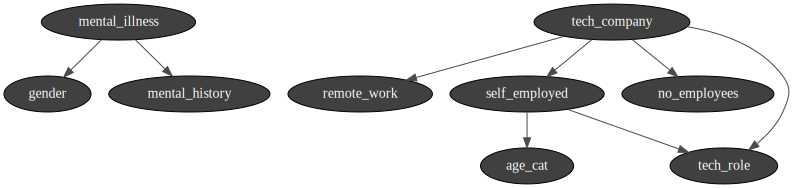

In [117]:
gnb.showBN(bn,size='15')

Bayesian network shows relation between mental illness, family history. Also, the graph indicates mental illness not directly related with other background informations.

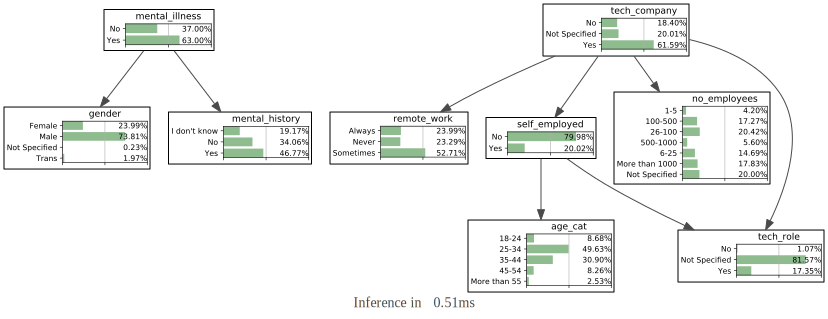

In [119]:
inference = bn_graphs.LazyPropagation(bn)
gnb.showInference(bn,size='15')

Let' try to ask some questions from our Bayesian network.
What is probabilty of possible to mental illnes condition if you some has family history of mental illness? or probabilty of don't have family history of mental illness.

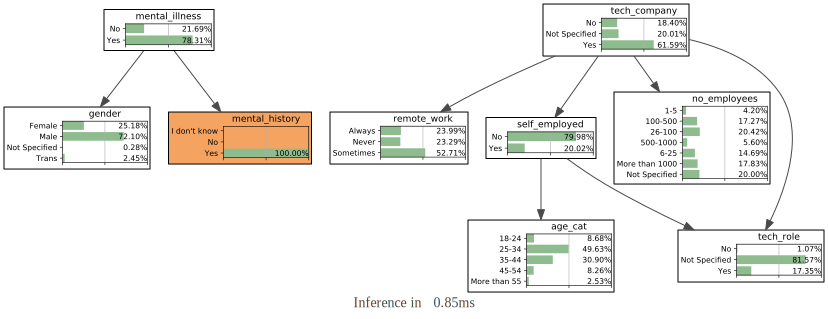

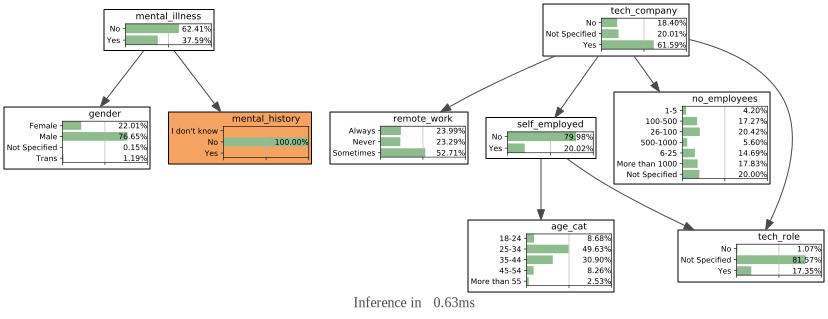

In [120]:
gnb.showInference( bn, inference, {'mental_history':'Yes'},size=15 )
gnb.showInference( bn, inference, {'mental_history':'No'},size=15 )

If someone have family history of mental illness, That person has **78.31%** percent chance to get mentall illness
Otherwise, If someone havn't family history of mental illness, that person has **37.59%** percent chance to get mentall illness. Therefore, family history of mental illness can increase chance into **40.72%**

### 3. What is the specific attitudes towards mental health in the workplace?


In [48]:
mental_illness_number=df_survey_short[df_survey_short.mental_illness=='Yes'].shape[0]
print("There are total %d people who are indicated mentall illnes" %(mental_illness_number))

There are total 901 people who are indicated mentall illnes


I have selected columns can be indicate attitude information of partcipants and seperated into three groups:

* How companies concern mental health?
  * employer provide mental health benefits
  * employer provide mental health care
  * employer ever formally discussed mental health
  * employer offer resources to learn more about mental health
* What are the difficulties ?
  * request a medical leave from work
  * mental health disorder would have negative consequences
  * physical health disorder would have negative consequences
  * discussing a mental health disorder with your coworkers
  * discussing a mental health disorder with your direct supervisor
  * employer takes mental health as seriously as physical health
* Consequence of mental illness
  * reveal mental illness to coworkers or employees
  * believe mental illness has impacted you negatively
  * productivity is ever affected by a mental health issue
  * share with friends and family that you have a mental illness
  * experienced an unsupportive or badly handled response to a mental health issue

Calculating percentage value of attitude columns among in Mental illness people

In [49]:
#select only mental illness records
df_survey_mental=df_survey_short[(df_survey_short.mental_illness=='Yes')]

In [50]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

In [34]:
# gathering full name of questions
print(getKeysByValue(columns_names, 'seek_treatment'))
df_survey_mental['seek_treatment'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

['Have you ever sought treatment for a mental health issue from a mental health professional?']


Yes    77.4%
No     22.6%
Name: seek_treatment, dtype: object

In [35]:
# gathering full name of questions
print(getKeysByValue(columns_names, 'work_interferes'))
df_survey_mental['work_interferes'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?']


Sometimes               34.7%
Rarely                  31.2%
Not applicable to me    17.1%
Never                    9.9%
Often                    7.1%
Name: work_interferes, dtype: object

In [36]:
# gathering full name of questions
print(getKeysByValue(columns_names, 'emp_health_benefits'))

df_survey_mental['emp_health_benefits'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'


['Does your employer provide mental health benefits as part of healthcare coverage?']


Yes                                40.1%
Not Specified                      21.9%
I don't know                       19.3%
No                                 12.8%
Not eligible for coverage / N/A     6.0%
Name: emp_health_benefits, dtype: object

In [37]:
# gathering full name of questions
print(getKeysByValue(columns_names, 'dif_mental_health_consequence'))

df_survey_mental['dif_mental_health_consequence'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

['Do you think that discussing a mental health disorder with your employer would have negative consequences?']


Yes              50.7%
No               27.4%
Not Specified    21.9%
Name: dif_mental_health_consequence, dtype: object

In [38]:
# gathering full name of questions
print(getKeysByValue(columns_names, 'productivity_effect'))

df_survey_mental['productivity_effect'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

['Do you believe your productivity is ever affected by a mental health issue?']


Not Specified           78.1%
Yes                     19.0%
Unsure                   1.9%
No                       0.7%
Not applicable to me     0.3%
Name: productivity_effect, dtype: object

### Building Bayesian Network in consequence features

In [166]:
features_con = ['mental_illness','work_interferes','productivity_effect','negative_impact','share_mental_illness']

data2=df_survey_short[features_con]

#data2=data.copy()
file='data.csv'
data2.to_csv(file,index=False)
# call a BN learner
learner = gum.BNLearner(file)
# specify the learning algorithm. For the purposes of this unit, one can use the Hill Climbing algorithm
learner.useGreedyHillClimbing()
# learn the data
bn = learner.learnBN()

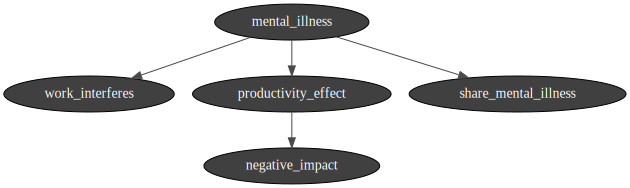

In [167]:
gnb.showBN(bn,size='18')

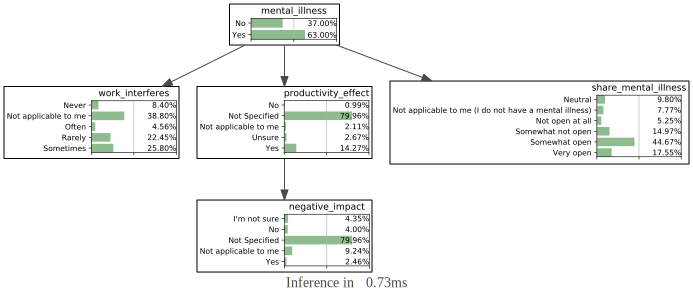

In [168]:
inference = bn_graphs.LazyPropagation(bn)
gnb.showInference(bn,size='20')

Let' try to ask some questions from our Bayesian network.
How different consequence of mental illness people??

If people have mental illness that can increase work interferes and slithly increase prodictivty and negative impact. But a around 80% of partcipant not answered this question as record "Not specified" in dataset.

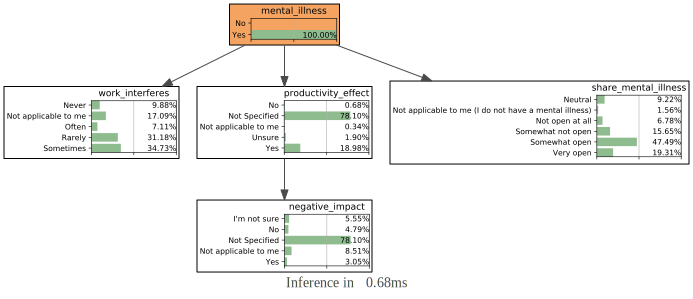

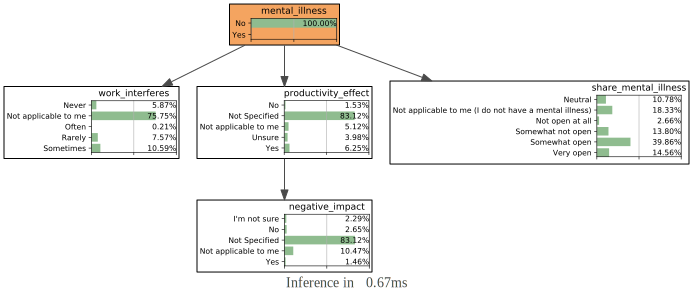

In [170]:
gnb.showInference( bn, inference, {'mental_illness':'Yes'},size=15 )
gnb.showInference( bn, inference, {'mental_illness':'No'},size=15 )

***
<a id='Visualisation'></a>
## 1_5. Visualisation

### 1. What is the frequency of each geographic location (countries and states)? Which countries have highest number of mental illnes?

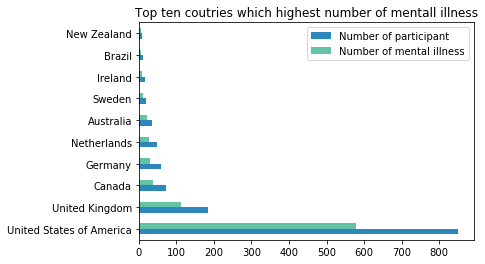

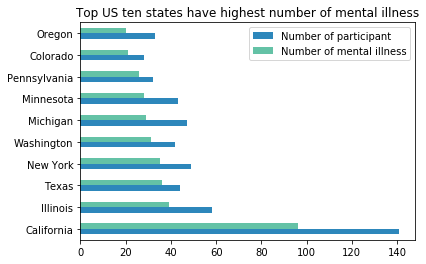

In [39]:
# Defined colors
colors = ['#2D87BB', '#64C2A6', '#AADEA7', '#E6F69D','#FEAE65','#F66D44']

df_country_percent.rename(columns={'Number':'Number'}).plot(kind='barh',colors=colors,
                       title='Top ten coutries which highest number of mentall illness');

df_state_percent.head(10).rename(columns={'Count_2014':'Year 2014',
                                  'Count_2016':'Year 2016'}).plot(kind='barh',colors=colors,
                       title='Top US ten states have highest number of mental illness');

### 2. Which factor can be strongest predictors of mental health illness?

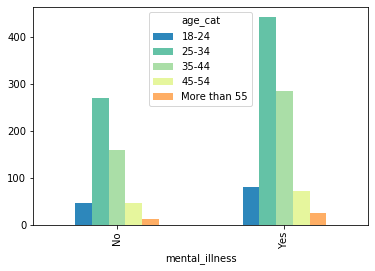

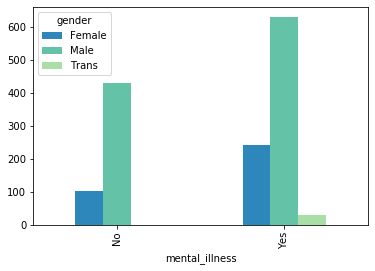

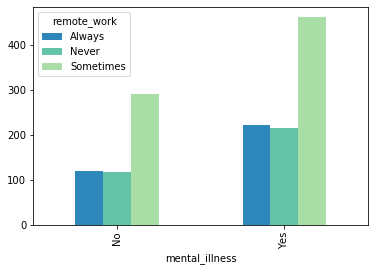

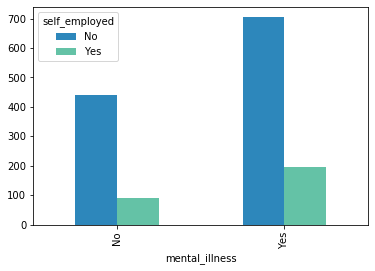

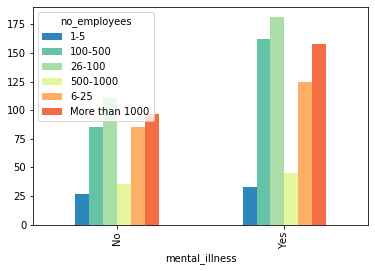

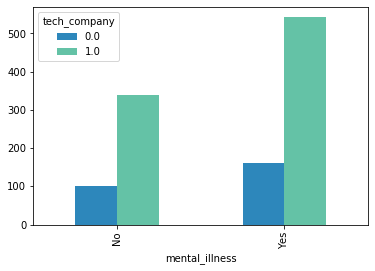

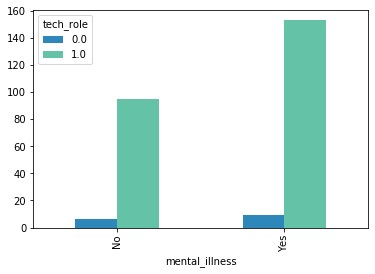

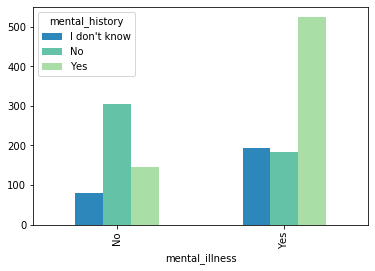

In [40]:
for i in feature_list:
    # excludeded all Not Specified records
    temp=df_survey_short[df_survey_short[i]!='Not Specified']

    contingency_table=pd.crosstab(temp['mental_illness'],temp[i])
    contingency_table.plot(kind='bar',colors=colors)

### 3. What is the specific attitudes towards mental health in the workplace?

In [1]:
fig, ax = plt.subplots(figsize = (16, 12), ncols=2, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('How companies are concerning about mental health?', fontsize = 25, y = 1);
#colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3']
colors = ['#2D87BB', '#64C2A6', '#AADEA7', '#E6F69D','#FEAE65','#F66D44']

#Do you have a family history of mental illness?
column='dif_request_medical_leave'

labels = df_survey_mental[column].unique()
title='Does your employer provide mental health \nbenefits as part of healthcare coverage?'
ax[0][0].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[0][0].set_title(title, pad = 14, fontsize = 13,loc='right');

#Have you had a mental health disorder in the past?
column='emp_care_options'
labels = df_survey_mental[column].unique()
title='Do you know the options for mental health care \navailable under your employer-provided coverage?'
ax[0][1].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[0][1].set_title(title, pad = 14, fontsize = 13,loc='center');

#Have you been diagnosed with a mental health condition by a medical professional?
column='emp_discussed_mental'

labels = df_survey_mental[column].unique()
title='Has your employer ever formally discussed mental health?'
ax[1][0].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[1][0].set_title(title, pad = 14, fontsize = 13,loc='center');

#Have you been diagnosed with a mental health condition by a medical professional?
column='emp_offer_resources'

labels = df_survey_mental[column].unique()
title='Does your employer offer resources to learn more about \nmental health concerns and options for seeking help?'
ax[1][1].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[1][1].set_title(title, pad = 14, fontsize = 13,loc='left');

NameError: name 'plt' is not defined

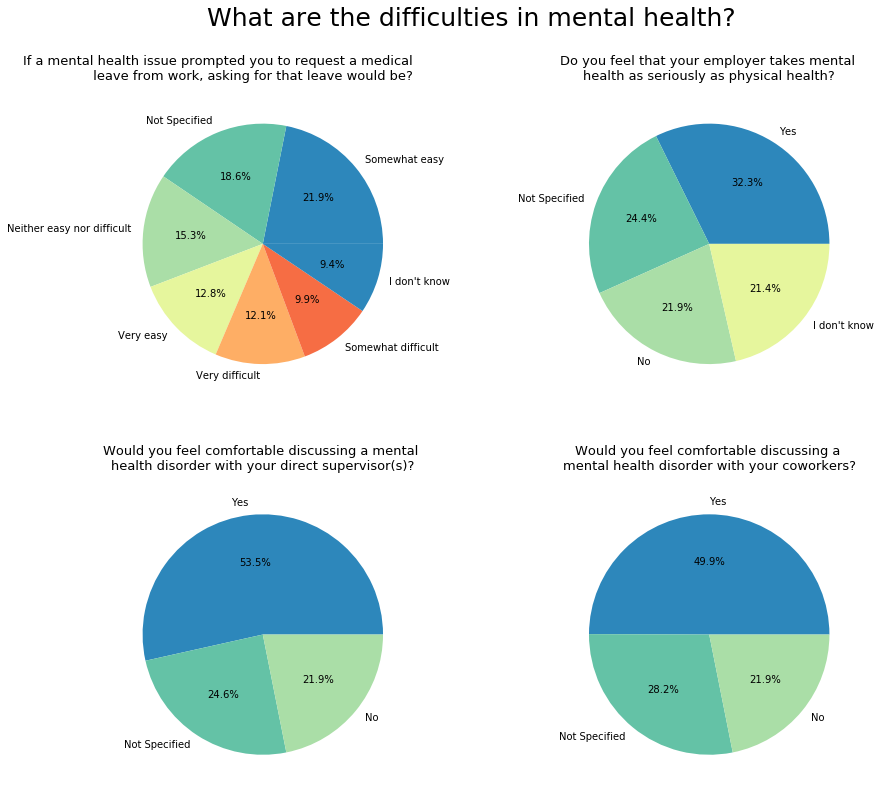

In [42]:
fig, ax = plt.subplots(figsize = (16, 12), ncols=2, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('What are the difficulties in mental health?', fontsize = 25, y = 1);

#Do you have a family history of mental illness?
column='dif_request_medical_leave'

labels = df_survey_mental[column].unique()
title='If a mental health issue prompted you to request a medical\n leave from work, asking for that leave would be?'
ax[0][0].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[0][0].set_title(title, pad = 14, fontsize = 13,loc='right');

#Have you had a mental health disorder in the past?
column='dif_mental_vs_physical'
labels = df_survey_mental[column].unique()
title='Do you feel that your employer takes mental \nhealth as seriously as physical health?'
ax[0][1].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[0][1].set_title(title, pad = 14, fontsize = 13,loc='center');

#Have you been diagnosed with a mental health condition by a medical professional?
column='dif_discuss_supervisor'

labels = df_survey_mental[column].unique()
title='Would you feel comfortable discussing a mental \nhealth disorder with your direct supervisor(s)?'
ax[1][0].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[1][0].set_title(title, pad = 14, fontsize = 13,loc='center');

#Have you been diagnosed with a mental health condition by a medical professional?
column='dif_discuss_coworkers'

labels = df_survey_mental[column].unique()
title='Would you feel comfortable discussing a \nmental health disorder with your coworkers?'
ax[1][1].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[1][1].set_title(title, pad = 14, fontsize = 13,loc='center');

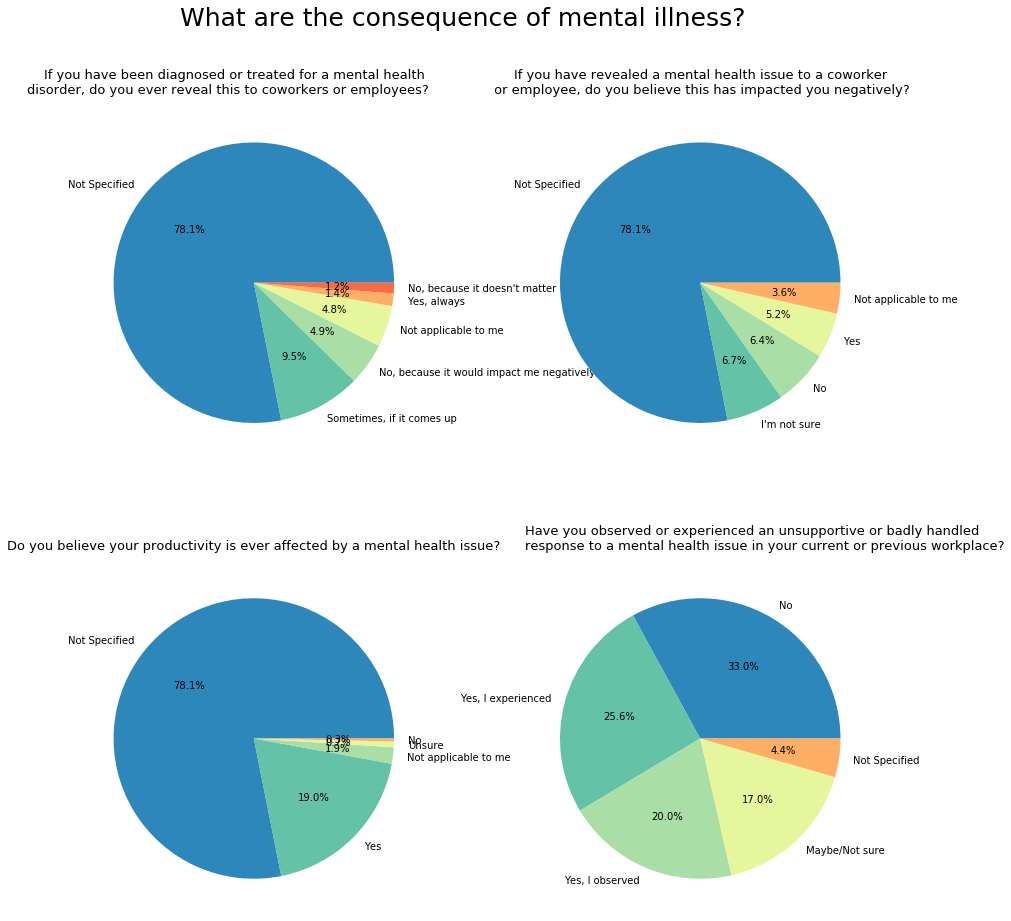

In [43]:
fig, ax = plt.subplots(figsize = (16, 14), ncols=2, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('What are the consequence of mental illness?', fontsize = 25, y = 1);

#Do you have a family history of mental illness?
column='reveal_mental_health'

labels = df_survey_mental[column].unique()
title='If you have been diagnosed or treated for a mental health \ndisorder, do you ever reveal this to coworkers or employees?'
ax[0][0].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[0][0].set_title(title, pad = 14, fontsize = 13,loc='right');

#Have you had a mental health disorder in the past?
column='negative_impact'
labels = df_survey_mental[column].unique()
title='If you have revealed a mental health issue to a coworker\n or employee, do you believe this has impacted you negatively?'
ax[0][1].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[0][1].set_title(title, pad = 14, fontsize = 13,loc='center');

#Have you been diagnosed with a mental health condition by a medical professional?
column='productivity_effect'

labels = df_survey_mental[column].unique()
title='Do you believe your productivity is ever affected by a mental health issue?'
ax[1][0].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[1][0].set_title(title, pad = 14, fontsize = 13,loc='center');

#Have you been diagnosed with a mental health condition by a medical professional?
column='observed_bad_response'

labels = df_survey_mental[column].unique()
title='Have you observed or experienced an unsupportive or badly handled \nresponse to a mental health issue in your current or previous workplace?'
ax[1][1].pie(df_survey_mental[column].value_counts(normalize=True),
            labels=labels,colors=colors,
            autopct='%1.1f%%');
ax[1][1].set_title(title, pad = 14, fontsize = 13,loc='left');


<a id='Insight'></a>
## 1_6.Insight
---
### 1. What is the frequency of each geographic location (countries and states)? Which countries have highest number of mental illnes?

* The United States of America is highest number mental illness and the United Kingdom and Canada follows.
* In the survey, California, Washington and, New York are highest mental illness. That can be related with a number of IT and tech compnanies located in those states. By 2016, number of mentall illness was slithly reduced in Washington, NewYork, Tennesse, despite number of illness was increased in Illinois.
* However, More than 85% of participants only from top five countries. Especially from US and UK, they have 75%. It might be related that OSMI orginization originally founded in US. The survey not includes Asian developed countries much. Only one person was participanted from Japan.
---
### 2. Which factor can be strongest predictors of mental health illness?
* As a result of data analysis, family history of mental illness can be stongest predictor of current mental health conditions in this survey.  The reason is most mental illness people answered 'yes' in family history questions. 
* Also, gender and mental illness might have relations because all trans gender people answered "Yes" in mental illness quesions. 
* Dispite,much less difference between mental illness conditon and non-mental healh condition in other backgound informations. Therefore that informations /Age, remote working, self-employed etc,./ can not be prediction for person who is possble to mental illness condition.
* Bayesian network shows relation between mental illness, family history, and gender as well as mental illness not directly related with other background informations.
* If someone has family history of mental illness, 40.72% more chance to get mental illness condition
---
### 3. What is the specific attitudes towards mental health in the workplace? 
* Around 57.7% of employers formally discussed mental health and 38% of employers offer resource to learning mental health. However, only 19% of a mental disorder participant recieves mental health benefits as part of healthcare coverage and nearly half of mental disordered participant didn't know any option for mental health care coverage.
* Migtht be companies are concerning about mental health. But only limited number of them provide metal health covers. Therefore, if staff has diagnosed mental illness condition, they can't recieve sufficient health benefits from their empoloyers.
* Around half of the participants are comfortably talking about mental health with their supervisor and peers.
* Most people think that having a Mental Health Disorder would affect on your productivity as well as 10% of participants reveal their coworkers and employer. Half of participants didn't either observed or experienced a bad response to Mental Health around them.
* If people have mental illness that can increase work interferes and slithly increase prodictivty and negative impact.



---
---


### **Selected question :** What were the top Australian news topics over the last decade, and what can these say about the national conversation?
<a id='2_1'></a>
## 2_1.Question

#### Stack holders, How interest this data analysis. 

* **Public/Media :** What happened in last 15 years in Australian day lives. It is difficulty remember all important events. Therefore, that data analytics can be good outline as well as the analytcs can change unstructured of large amount of text data into structured dataset. 
* The original dataset consist only two columns including date and headline text. That sturcture is difficult for gathering useful analysis and provide very limited information such as just counting how many headline in certain time periods. As a result of data analytics, data will be more flexible and well structured. The stackholders possible to ask more useful information. 
    For instance, 
     + Which word more dominantly used in certain period time?
     + When particular word used and how frequently?

***
<a id='2_2'></a>
## 2_2.Data collection

In [2]:
# installing gensim library
%pip install gensim

  Using cached gensim-3.8.2-cp37-cp37m-manylinux1_x86_64.whl (24.2 MB)
Processing /home/jovyan/.cache/pip/wheels/1a/8c/a2/7b24df77c58dab0aec275c1bd3d4392d54df941020199f6759/smart_open-1.11.1-py3-none-any.whl
  Using cached boto-2.49.0-py2.py3-none-any.whl (1.4 MB)
     |████████████████████████████████| 128 kB 18.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.1 MB 22.7 MB/s eta 0:00:01
  Using cached jmespath-0.9.5-py2.py3-none-any.whl (24 kB)
  Using cached s3transfer-0.3.3-py2.py3-none-any.whl (69 kB)
  Using cached docutils-0.15.2-py3-none-any.whl (547 kB)
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
Note: you may need to restart the kernel to use updated packages.


In [4]:
# importing all necessary libraries.
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# gensim library is used for natural language processing
from gensim.utils import tokenize
from gensim.utils import simple_preprocess
from gensim.corpora.textcorpus import remove_stopwords
from gensim.corpora import Dictionary
from gensim.utils import lemmatize

# disable warning messages
import warnings; warnings.simplefilter('ignore')

***
<a id='2_3'></a>
## 2_3.Data cleaning / Preprocess



### Loading dataset

In [49]:
df_headline=pd.read_csv('abcnews-date-text.csv')
df_headline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 2 columns):
publish_date     1186018 non-null int64
headline_text    1186018 non-null object
dtypes: int64(1), object(1)
memory usage: 18.1+ MB


### Creating year, month and columns.

Dataset not includes any null values.
Firlsty, I have and created year, months ,day columns, those columns can be help for further analysis such as grouping dataset by each year or months.

In [6]:
df_headline['year']=df_headline['publish_date'].astype(str).str.slice(0,4)
df_headline['months']=df_headline['publish_date'].astype(str).str.slice(5,6)
df_headline['day']=df_headline['publish_date'].astype(str).str.slice(7,8)
df_headline.head(2)

,publish_date,headline_text,year,months,day
0,20030219,aba decides against community broadcasting lic...,2003,2,9
1,20030219,act fire witnesses must be aware of defamation,2003,2,9


After that, I have created method for converting headline sentences into


In [9]:
def create_term(df):
    
    df['terms'] = [remove_stopwords(list(simple_preprocess(headline))) for headline in df['headline_text']]
    
    return df

Created new column which includes 

In [10]:
%%time
df_headline=create_term(df_headline)
df_headline

CPU times: user 11.8 s, sys: 268 ms, total: 12.1 s
Wall time: 12.1 s


,publish_date,headline_text,year,months,day,terms
0,20030219,aba decides against community broadcasting lic...,2003,2,9,"[aba, decides, community, broadcasting, licence]"
1,20030219,act fire witnesses must be aware of defamation,2003,2,9,"[act, witnesses, aware, defamation]"
2,20030219,a g calls for infrastructure protection summit,2003,2,9,"[calls, infrastructure, protection, summit]"
3,20030219,air nz staff in aust strike for pay rise,2003,2,9,"[air, nz, staff, aust, strike, pay, rise]"
4,20030219,air nz strike to affect australian travellers,2003,2,9,"[air, nz, strike, affect, australian, travellers]"
...,...,...,...,...,...,...
1186013,20191231,vision of flames approaching corryong in victoria,2019,2,1,"[vision, flames, approaching, corryong, victoria]"
1186014,20191231,wa police and government backflip on drug amne...,2019,2,1,"[wa, police, government, backflip, drug, amnes..."
1186015,20191231,we have fears for their safety: victorian premier,2019,2,1,"[fears, safety, victorian, premier]"
1186016,20191231,when do the 20s start,2019,2,1,[start]


***
<a id='2_4'></a>
## 2_4.Analysis

### Calculate most frequent word of whole collection

I have created custom method called **word_frequent_by_year**. That method returns 

In [28]:
def word_frequent_by_year(df):
    year_list=df['year'].unique() # creatin list of years
    pd.DataFrame
    temp_df=pd.DataFrame()#create emtpy dataframe frame for return
    for year in year_list:
        print('processng..:' + str(year))
        
        df_year=df[df['year']==year] # seperating dataframe of each year
        dct = Dictionary(df_year['terms']) # initialize a Dictionary
        inv_map = {v: k for k, v in dct.token2id.items()} # inverting dict of word list
        data=pd.DataFrame(inv_map.items(),columns=['id', 'word']).drop(columns='id') # selecting word list
        data2=pd.DataFrame(dct.cfs.items(),columns=['id', 'frequency']).drop(columns='id') # selecting frequent of word
        word_frequent=pd.concat([data,data2],axis=1) # merging two dataset
        word_frequent['year']=year #assigning current year
        #print(word_frequent)
        temp_df=temp_df.append(word_frequent,ignore_index=True)
    
    return temp_df

In [12]:
%%time
# runnning total ammount 

# running word_frequent_by_year functions
df_frequent_total=word_frequent_total(df_headline)

CPU times: user 16.1 s, sys: 23 ms, total: 16.1 s
Wall time: 16.1 s


In [18]:
top_20=list(df_frequent_total.sort_values(by='frequency',ascending=False).head(20)['word'])

In [19]:
df_frequent_total.sort_values(by='frequency',ascending=False).head(20)

,word,frequency
269,offer,38164
440,entry,31320
328,bombing,29772
473,says,22118
244,court,17418
186,govt,17018
41,iraq,16717
1703,jackson,15344
43,australia,14810
199,toddler,14114


### Calculate most frequent word by year

In [29]:
def word_frequent_total(df):
    pd.DataFrame
    temp_df=pd.DataFrame()#create emtpy dataframe frame for return
        
    dct = Dictionary(df['terms']) # initialize a Dictionary
    inv_map = {v: k for k, v in dct.token2id.items()} # inverting dict of word list
    data=pd.DataFrame(inv_map.items(),columns=['id', 'word']).drop(columns='id') # selecting word list
    data2=pd.DataFrame(dct.cfs.items(),columns=['id', 'frequency']).drop(columns='id') # selecting frequent of word
    word_frequent=pd.concat([data,data2],axis=1) # merging two dataset
        #print(word_frequent)
    temp_df=temp_df.append(word_frequent,ignore_index=True)
    
    return temp_df

In [20]:
%%time
# running word_frequent_by_year functions
df_frequent_year=word_frequent_by_year(df_headline)

processng..:2003
processng..:2004
processng..:2005
processng..:2006
processng..:2007
processng..:2008
processng..:2009
processng..:2010
processng..:2011
processng..:2012
processng..:2013
processng..:2014
processng..:2015
processng..:2016
processng..:2017
processng..:2018
processng..:2019
CPU times: user 16.3 s, sys: 35.9 ms, total: 16.3 s
Wall time: 16.3 s


In [32]:
df_frequent_year.to_csv('df_frequent_year.csv')

In [33]:
df_frequent_year=pd.read_csv('df_frequent.csv',index_col=0)
df_frequent_year  # The dataset shows each word how much

,word,frequency,year
0,aba,16,2003
1,broadcasting,10,2003
2,community,248,2003
3,decides,5,2003
4,licence,55,2003
...,...,...,...
459611,palmerville,1,2019
459612,clifton,1,2019
459613,numerous,1,2019
459614,tarbuck,1,2019


In [40]:
common_word=[]
for year in df_frequent_year['year'].unique():# creatin list of years
    temp=list(df_frequent_year[df_frequent_year['year']==year].sort_values(by='frequency',
                                                                    ascending=False).head(3)['word'])
    common_word+=temp

In [41]:
len(common_word)

51

In [42]:
df_20=df_frequent_year[df_frequent_year['word'].isin(common_word)]

In [43]:
df_20=df_20.pivot(index='word', columns='year', values='frequency')

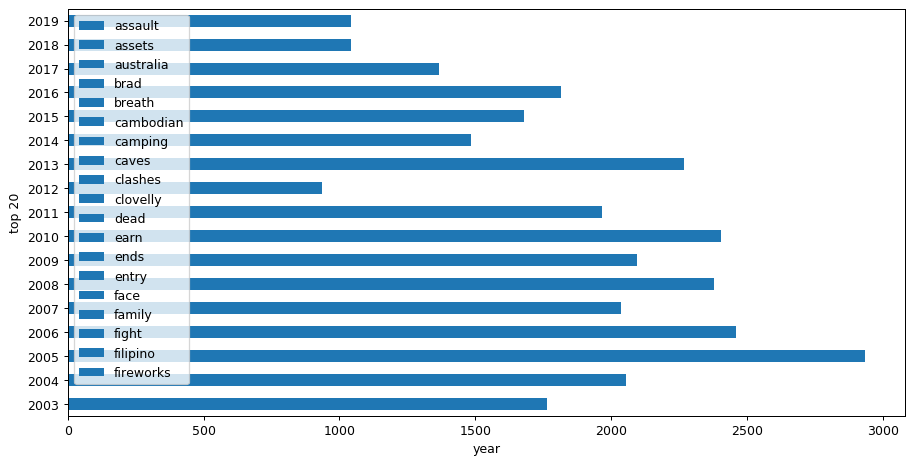

In [44]:
plt.figure(figsize=(12, 6),dpi=90)
ax = plt.gca()
for i in range(1,20):
    df_20.iloc()[i].plot(kind='barh',label=df_20.index[i]);

plt.legend(loc="upper left")
plt.xlabel("year")
plt.ylabel("top 20")
plt.show()

In [45]:
df_20

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
word,,,,,,,,,,,,,,,,,
arrest,132.0,112.0,105.0,114.0,177.0,170.0,2669.0,14.0,33.0,74.0,158.0,3.0,2.0,327.0,112.0,98.0,1.0
assault,187.0,175.0,12.0,68.0,37.0,2377.0,10.0,37.0,21.0,179.0,439.0,11.0,497.0,226.0,57.0,205.0,15.0
assets,18.0,1991.0,1.0,7.0,21.0,18.0,1.0,23.0,18.0,5.0,15.0,34.0,30.0,2.0,159.0,11.0,5.0
australia,505.0,2.0,188.0,51.0,3.0,475.0,27.0,536.0,35.0,937.0,1162.0,1486.0,1678.0,10.0,11.0,1043.0,953.0
brad,NaN,1.0,4.0,5.0,9.0,9.0,1.0,26.0,1776.0,31.0,15.0,45.0,4.0,6.0,9.0,9.0,3.0
breath,7.0,15.0,15.0,11.0,12.0,19.0,30.0,1.0,6.0,11.0,8.0,4.0,15.0,26.0,6.0,5.0,1043.0
cambodian,29.0,1.0,23.0,2458.0,10.0,13.0,7.0,4.0,8.0,17.0,46.0,30.0,43.0,15.0,15.0,17.0,9.0
camping,7.0,139.0,6.0,691.0,4.0,8.0,2095.0,8.0,11.0,13.0,17.0,257.0,16.0,11.0,17.0,10.0,8.0
caves,3.0,9.0,NaN,3.0,6.0,3.0,1.0,2.0,5.0,2.0,2267.0,4.0,20.0,5.0,4.0,12.0,1.0


***
<a id='2_5'></a>
## 2_5.Visualisation

***
<a id='2_6'></a>
## 2_6.Insight